# scikit-linear-regression

Use the "Run" button to execute the code.

## Saving Command

In [59]:
!pip install jovian --upgrade --quiet

In [60]:
import jovian

In [ ]:
jovian.commit(project="scikit-linear-regression")

<IPython.core.display.Javascript object>

## Explaination

<b>We will predict charge</b>

1.Donwload data
2.Clean Data
3.Find Best Correlation
4.Create inputs and targets
5.Create model and train the model
6.Generate predictions
7.Compute loss to evalute the model


## 1.Downoading Data

In [4]:
data_url='https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [5]:
from urllib.request import urlretrieve

In [6]:
urlretrieve(data_url,'medical_data.csv')

('medical_data.csv', <http.client.HTTPMessage at 0x7f7ca8bd6880>)

## 2.Cleaning Data

Data is cleaned

In [7]:
import pandas as pd

In [8]:
medical_df=pd.read_csv('medical_data.csv')

In [9]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## 3.Correlation

In [10]:
medical_df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Charges vs Smoker not existed here

In [11]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)  #map takes function or dictionary.if no return 0, if yes return 1
medical_df.charges.corr(smoker_numeric)

0.7872514304984782

<b>The best correlation is with smoker <br>
    And the 2nd is age
    <br>
    As everyone is not smoker we will use age column to predict
</b>

## 4.input and target

In [16]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [17]:
inputs, targets = non_smoker_df[['age']], non_smoker_df['charges']

In [58]:
# for multiple features
# inputs, targets = non_smoker_df[['age', 'bmi']], non_smoker_df['charges']

## 5.Create a model object

In [18]:
!pip install scikit-learn --quiet
from sklearn.linear_model import LinearRegression

In [19]:
model = LinearRegression().fit(inputs, targets)

## Generate predictions

In [21]:
predictions = model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [30]:
#my predict
import numpy as np
input=np.array([[23], [37], [61]])
model.predict(input)

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 4055.30443855,  7796.78921819, 14210.76312614])

## RMSE loss

In [35]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [36]:
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.505766636391


## Visualize the line with coefficient

The parameters of the model are stored in the coef_ and intercept_ properties.

In [51]:
import matplotlib.pyplot as plt
def estimate_charges(age, w, b):    #The estimate_charges function is our very first model.
    return w * age + b
def try_parameters(w, b):         # works as model.predict(input)
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)
    
    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);
    
    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

RMSE Loss:  4662.505766636391


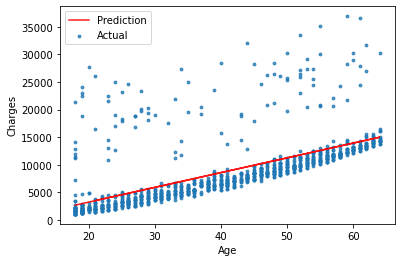

In [52]:
try_parameters(model.coef_, model.intercept_)